In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt


#np.set_printoptions(precision=4)
import math
from utils import *

nS = 8
nA = 2
seed = 3231
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, gamma=gamma, small=5, large=1000, seed=seed)
tau = 0.3
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)


In [2]:
r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)
Q_star, _ = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, gamma).values()
pi = get_policy(Q_star)
pi_prime = np.array([[0., 1.] for i in range(nS)])
d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)
V_star = get_value_function(Q_star)
print(tmdp.P_mat.shape)
print(Q_star)

Q_star_0 , _ = bellman_optimal_q(tmdp.P_mat, tmdp.reward, gamma).values()
print(Q_star_0)

(8, 2, 8)
[[197.33860226 192.95416508]
 [193.65110261 191.12121965]
 [191.32797784 189.99387525]
 [189.86440925 191.23860869]
 [189.8081067  198.77761403]
 [194.55768008 223.6183101 ]
 [210.20731862 302.85617042]
 [260.12717063 555.34815579]]
[[ 68.0544467   70.06049679]
 [ 63.05444711  96.0088304 ]
 [ 86.40794736 140.21710219]
 [126.19539197 206.88545394]
 [186.19690854 305.73248103]
 [275.15923293 451.91574319]
 [406.72416887 668.01969924]
 [601.21772931 987.46905542]]


In [20]:
status_step = 30000


e is 0


In [4]:
Q = np.zeros((nS, nA))
Qs = Q_learning(tmdp, Q, alpha=0.04, episodes=1000000, status_step=status_step)

In [5]:
Q_0 = np.zeros((nS, nA))
Qs_0 = Q_learning(mdp, Q_0, alpha=0.1, episodes=1000000, status_step=status_step, state_distribution=d)

In [6]:
print(Qs["Qs"][-1])
print(Qs_0["Qs"][-1])
visits = Qs["visits"]
print(visits)
visit_dist = visits / np.sum(visits)
print(visit_dist)
print(d)

[[193.42771674 174.75821994]
 [189.49453051 174.93660127]
 [185.43998414 172.08045168]
 [173.3388016  186.75063167]
 [174.05548331 198.0390624 ]
 [194.19494658 224.29623538]
 [209.53335414 306.30786961]
 [264.5434792  568.62975321]]
[[  65.75509244   69.73561819]
 [  64.15329115   96.84060249]
 [  88.729773    144.31710779]
 [ 129.03957911  210.4447974 ]
 [ 189.62375682  313.55118469]
 [ 284.37648813  470.40973201]
 [ 420.39066869  688.97609332]
 [ 610.74697833 1009.65196997]]
[129309. 129154. 122262. 106365. 116793. 141446. 175948.  78731.]
[0.12930797 0.12915297 0.12226102 0.10636415 0.11679207 0.14144487
 0.17594659 0.07873037]
[0.2591634  0.07879438 0.05165775 0.08583725 0.11334557 0.12742383
 0.18389381 0.09988401]


In [7]:
print(get_policy(Qs_0["Qs"][1]))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
visit_weights = 1.0 / (d + 1e-8)
visit_weights = visit_weights / np.sum(visit_weights)
print(visit_weights)

[0.0484271  0.15928206 0.24295544 0.14621311 0.11072804 0.09849439
 0.0682488  0.12565106]


In [9]:
print(d)
print(Qs["visit_weights"])
print(get_policy(Qs["Qs"][-1]))
print(pi)

[0.2591634  0.07879438 0.05165775 0.08583725 0.11334557 0.12742383
 0.18389381 0.09988401]
[0.11529705 0.11543542 0.1219426  0.14016778 0.12765274 0.10540381
 0.08473496 0.18936563]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
tau_prime = 0.
metrics = compute_metrics(tmdp, Qs["Qs"], Q_star, tau_prime=tau_prime)
metrics_0 = compute_metrics(mdp, Qs_0["Qs"], Q_star_0, tau_prime=tau_prime)
print(metrics)
print(metrics_0)

{'J': [35.595799375000006, 293.05371165085023, 310.05861698072135, 246.48188362430128, 362.54953332572023, 307.02578287933886, 265.51698800021546, 259.88149425432823, 262.48415389883303, 302.3940379969599, 322.2214666222897, 316.06060621667064, 341.50658321909754, 268.2465386914597, 293.05371165085023, 246.48188362430128, 302.3940379969599, 310.05861698072135, 316.06060621667064, 293.05371165085023, 316.06060621667064, 310.05861698072135, 365.78861003317843, 316.06060621667064, 273.8943101200351, 307.02578287933886, 316.06060621667064, 316.06060621667064, 340.6844168677573, 340.6844168677573, 310.05861698072135, 316.06060621667064, 340.6844168677573, 340.6844168677573, 340.6844168677573, 340.6844168677573], 'J_tau': [12.148623500089025, 245.4282489897702, 253.56143173191762, 239.70514708584065, 253.0961772742671, 251.2349231813987, 247.97376171414234, 245.33353865179004, 245.6472531636234, 250.62656967828954, 247.212920046811, 256.0592008142275, 247.77262568187544, 249.4394621009693, 2

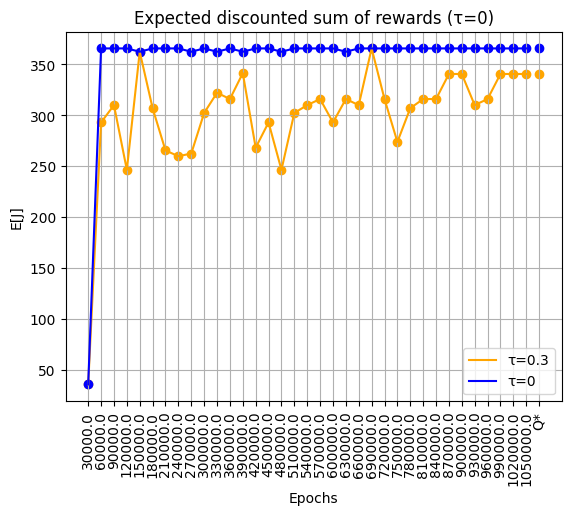

In [11]:
x = np.array([])
y_0 = np.array([])
y = np.array([])

for i, J in enumerate(metrics["J"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["J"][i])
    if i < len(metrics["J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="τ=0")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J]")
plt.title("Expected discounted sum of rewards (τ=0)")
plt.grid(visible=True)


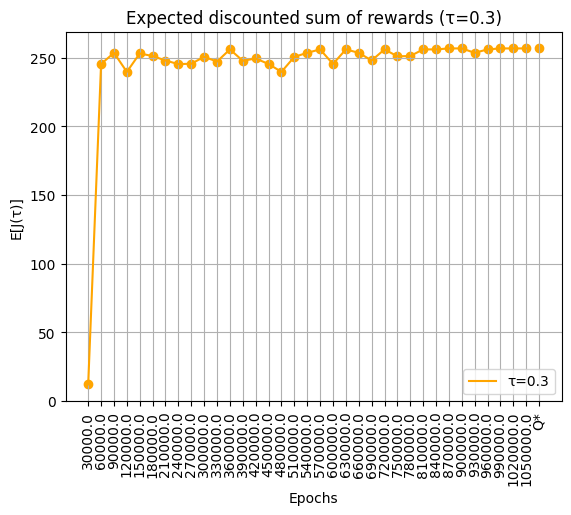

In [12]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["J_tau"]):
    y = np.append(y, J)
    if i < len(metrics["J_tau"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J(τ)]")
plt.title("Expected discounted sum of rewards (τ={})".format(tmdp.tau))
plt.grid(visible=True)

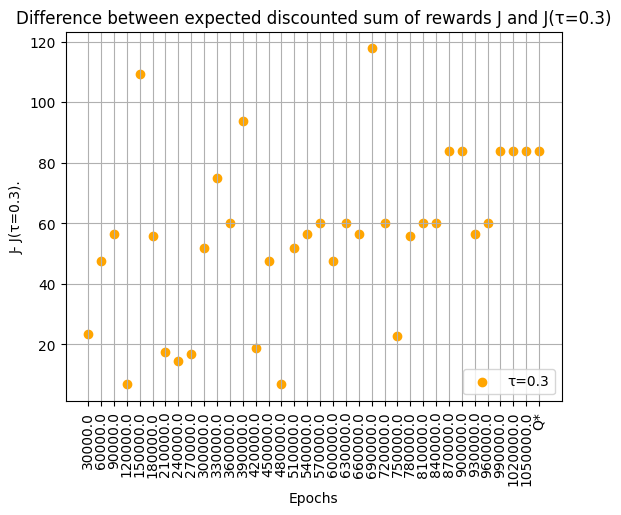

In [13]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["delta_J"]):
    y = np.append(y, J)
    if i < len(metrics["delta_J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.ylabel("J- J(τ={}).".format(tmdp.tau))
plt.title("Difference between expected discounted sum of rewards J and J(τ={})".format(tmdp.tau))
plt.grid(visible=True)

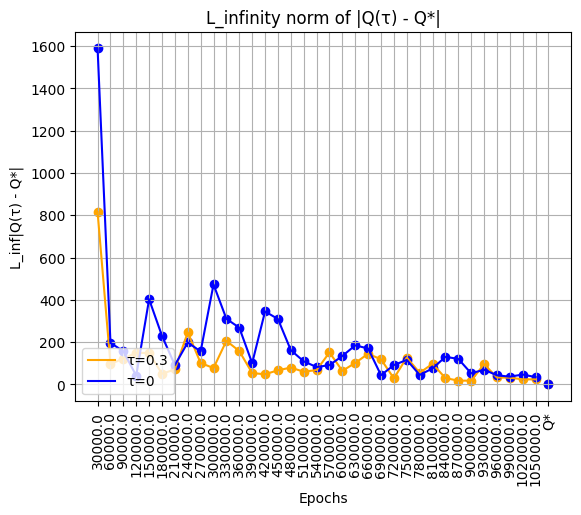

In [14]:
x = np.array([])
y = np.array([])
y_0 = np.array([])
for i, J in enumerate(metrics["delta_Q"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["delta_Q"][i])
    if i < len(metrics["delta_Q"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="τ=0")
plt.legend(loc="lower left")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("L_inf|Q(τ) - Q*|")
plt.title("L_infinity norm of |Q(τ) - Q*|")
plt.grid(visible=True)

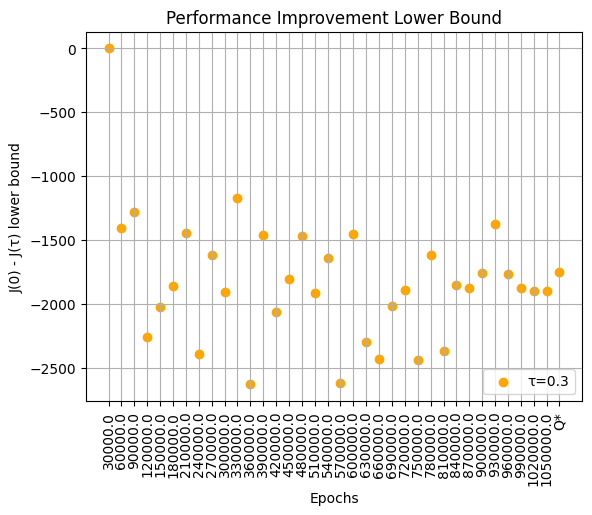

In [15]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["l_bounds"]):
    y = np.append(y, J)
    if i < len(metrics["l_bounds"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("J(0) - J(τ) lower bound")
plt.title("Performance Improvement Lower Bound")
plt.grid(visible=True)

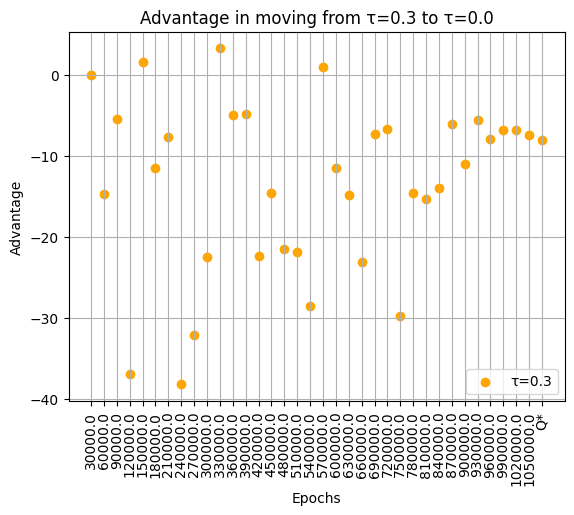

In [16]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["adv_terms"]):
    y = np.append(y, J)
    if i < len(metrics["adv_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Advantage")
plt.title("Advantage in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)

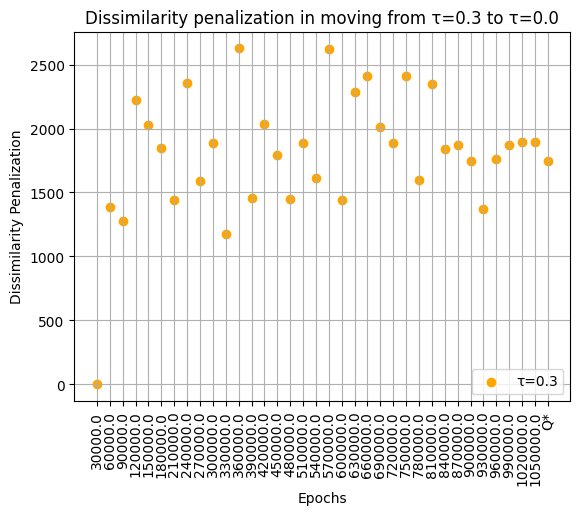

In [17]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["diss_terms"]):
    y = np.append(y, J)
    if i < len(metrics["diss_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Dissimilarity Penalization")
plt.title("Dissimilarity penalization in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)